In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

# Memuat data

In [2]:
data = pd.read_csv('mushrooms.csv')
display(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,p,k,y,e,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l


# Mempersiapkan data latih dan data uji

Untuk menentukan random_state dari model classification yang akan dibuat, kami harus mengetahui apakah variansi dari setiap kolom di data ini besar atau kecil. Oleh karena itu, kami harus mengetahui mean dan variansi dari setiap kolom. Lalu, kita hitung koefisien variansi untuk mengetahui apakah variansi dari data ini besar atau tidak.

In [3]:
X = data.drop(["class"], axis = 1)
y = data[["class"]]

X = pd.get_dummies(X)
print(X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)
display(X_train)
display(y_train)
X.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6752,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
414,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1011,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2519,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
3226,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1667,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3321,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1688,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


,class
6752,e
414,p
1011,e
2519,e
3226,p
...,...
7096,p
1667,p
3321,e
1688,e


Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

# Membangun Model Klasifikasi

In [4]:
# Define the classifier
logreg = LogisticRegression()

# Performing the model building
logreg.fit(X_train,y_train)

# Predicting the labels of the test dataset
y_pred=logreg.predict(X_test)

# Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test["class"], "y_pred": y_pred})
display(compare)


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,y_true,y_pred
7409,p,p
2981,e,e
5904,p,p
3089,p,p
7788,e,e
...,...,...
898,e,e
3006,e,e
774,e,e
6924,e,e


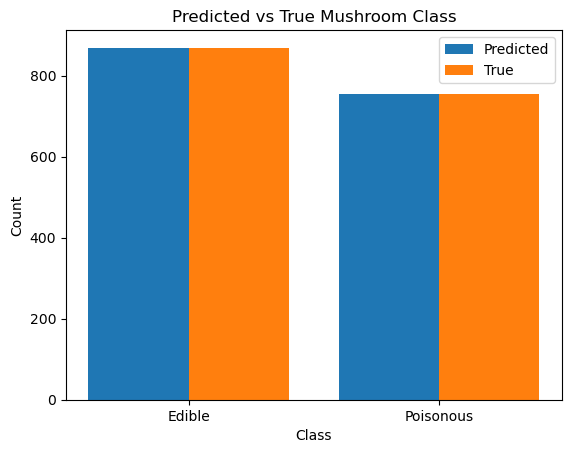

In [5]:
# Create a copy of the compare dataframe
compare_copy = compare.copy()

# Map the class labels to binary labels
compare_copy['y_true_binary'] = compare_copy['y_true'].map({'e': 0, 'p': 1})
compare_copy['y_pred_binary'] = compare_copy['y_pred'].map({'e': 0, 'p': 1})

# Count the number of edible and poisonous mushrooms in the test set
true_counts = compare_copy.groupby('y_true_binary').size()

# Count the number of edible and poisonous mushrooms predicted by the model
pred_counts = compare_copy.groupby('y_pred_binary').size()

# Create x-coordinates for the bars
x = np.arange(len(pred_counts))

# Create a bar plot of the predicted and true labels
fig, ax = plt.subplots()
ax.bar(x, pred_counts.values, width=0.4, label='Predicted')
ax.bar(x + 0.4, true_counts.values, width=0.4, label='True')

# Set the x-ticks and labels
ax.set_xticks(x + 0.2)
ax.set_xticklabels(['Edible', 'Poisonous'])

# Set the title and axis labels
plt.title('Predicted vs True Mushroom Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


# Membuat Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

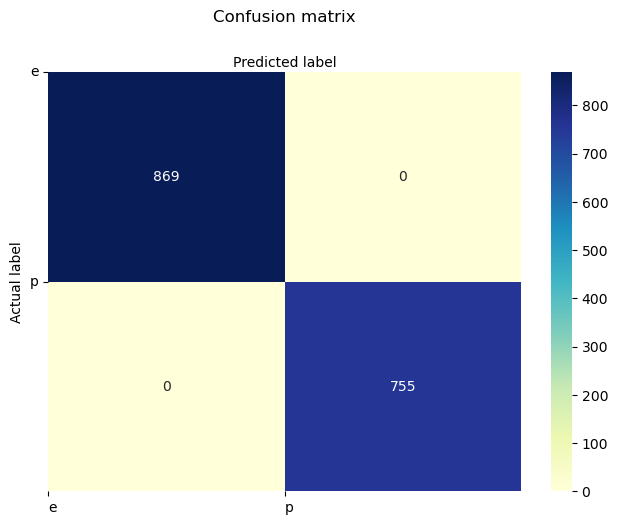

In [6]:
# Tuliskan label dari masing-masing kelas sesuai urutan
class_names= ['e', 'p']

# Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=class_names)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Menampilkan Ukuran Performansi Matrix

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       869
           p       1.00      1.00      1.00       755

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624



# Test dengan contoh input

In [8]:
test_data = pd.read_csv('mushroom_example.csv')
display(test_data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
1,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
2,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
3,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
4,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
5,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [9]:
# Load the data from the CSV file
logreg_columns = X.columns

test_data = pd.read_csv('mushroom_example.csv')
# Preprocess the data
TestX = test_data.drop('class', axis=1) # Extract features
TestX = pd.get_dummies(TestX) # One-hot encode categorical variables

# Check missing columns and add them to X
missing_cols = set(logreg_columns) - set(TestX.columns)
for col in missing_cols:
    TestX[col] = 0

# Set the column names in TestX to match the column names in logreg_columns
TestX = TestX[logreg_columns]

y = test_data['class'].map({'e': 0, 'p': 1}) # Convert labels to binary

# Make predictions using the logreg model
predictions = logreg.predict(TestX)

# Print the predictions
compare = pd.DataFrame({"y_true": test_data["class"], "y_pred": predictions})
display(compare)

,y_true,y_pred
0,p,p
1,e,e
2,e,e
3,e,e
4,p,p
5,e,e


# Kesimpulan

Berdasarkan nilai pada confusion matrix, dapat dilihat bahwa klasifikasi dengan menggunakan regresi logistik telah berjalan dengan sangat baik, tidak terdapat kesalahan prediksi apapun. Ketika dimasukkan 5 data baru, prediksi yang dihasilkan 100% akurat, sehingga model yang digunakan bisa diandalkan untuk mengidentifikasi jamur beracun khususnya dari keluarga spesies jamur  Agaricus dan Lepiota.